In [1]:
using Revise
__revise_mode__ = :eval
includet("Parameters.jl");
includet("GPURaytracing.jl");
includet("GPUTwoLayerRaytracing.jl")

In [33]:
__revise_mode__ = :eval

:eval

In [36]:
Parameters.initial_condition_file = "initial_conditions/initial_condition_512x512_U=1.10_freely_evolve.jld2"
Parameters.total_time = 1000.0f0

1000.0f0

In [37]:
start!()

Number of steps: 297550
step: 0000, t: 0.0, cfl: 0.15, walltime: 0.00 min
step: 1000, t: 3.4, cfl: 0.14, walltime: 0.21 min
step: 2000, t: 6.7, cfl: 0.13, walltime: 0.29 min
step: 3000, t: 10.1, cfl: 0.13, walltime: 0.36 min
step: 4000, t: 13.4, cfl: 0.12, walltime: 0.44 min
step: 5000, t: 16.8, cfl: 0.14, walltime: 0.52 min
step: 6000, t: 20.2, cfl: 0.14, walltime: 0.59 min
step: 7000, t: 23.5, cfl: 0.14, walltime: 0.67 min
step: 8000, t: 26.9, cfl: 0.14, walltime: 0.75 min
step: 9000, t: 30.2, cfl: 0.13, walltime: 0.82 min
step: 10000, t: 33.6, cfl: 0.14, walltime: 0.90 min
step: 11000, t: 37.0, cfl: 0.13, walltime: 0.98 min
step: 12000, t: 40.3, cfl: 0.14, walltime: 1.05 min
step: 13000, t: 43.7, cfl: 0.15, walltime: 1.13 min
step: 14000, t: 47.1, cfl: 0.15, walltime: 1.20 min
step: 15000, t: 50.4, cfl: 0.15, walltime: 1.28 min
step: 16000, t: 53.8, cfl: 0.14, walltime: 1.36 min
step: 17000, t: 57.1, cfl: 0.15, walltime: 1.43 min
step: 18000, t: 60.5, cfl: 0.14, walltime: 1.51 min
s

LoadError: ArgumentError: attempted to truncate a file that was already open

In [2]:
sqrtN = 6
packets = generate_initial_wavepackets(CPU(), 2π, 1.73, sqrtN^2, sqrtN)
packet_pos = @views packets[:, 3:4]

36×2 view(::Matrix{Float32}, :, 3:4) with eltype Float32:
  0.865   1.49822
 -0.865   1.49822
 -1.73    2.11864f-16
 -0.865  -1.49822
  0.865  -1.49822
  1.73   -4.23728f-16
  0.865   1.49822
 -0.865   1.49822
 -1.73    2.11864f-16
 -0.865  -1.49822
  0.865  -1.49822
  1.73   -4.23728f-16
  0.865   1.49822
  ⋮      
  0.865   1.49822
 -0.865   1.49822
 -1.73    2.11864f-16
 -0.865  -1.49822
  0.865  -1.49822
  1.73   -4.23728f-16
  0.865   1.49822
 -0.865   1.49822
 -1.73    2.11864f-16
 -0.865  -1.49822
  0.865  -1.49822
  1.73   -4.23728f-16

In [10]:
using JLD2
start_file = jldopen("packets.jld2.00000000")
file = jldopen("packets.jld2.00000004")
frames = keys(file["p/t"])
x = zeros(400, 1+length(frames), 2)
k = zeros(400, 1+length(frames), 2)
u = zeros(400, 1+length(frames), 2)
x[:, 1, :] = start_file["p/x/0"]
k[:, 1, :] = start_file["p/k/0"]
u[:, 1, :] = start_file["p/u/0"]
for i=1:length(frames)
    x[:, i+1, :] = file["p/x/" * frames[i]]
    k[:, i+1, :] = file["p/k/" * frames[i]]
    u[:, i+1, :] = file["p/u/" * frames[i]]
end

In [11]:
file["p/k"]

JLD2.Group
 ├─🔢 40000
 ├─🔢 40010
 ├─🔢 40020
 ├─🔢 40030
 ├─🔢 40040
 ├─🔢 40050
 ├─🔢 40060
 ├─🔢 40070
 ├─🔢 40080
 └─ ⋯ (991 more entries)

(400, 1)
(400, 1001, 1)


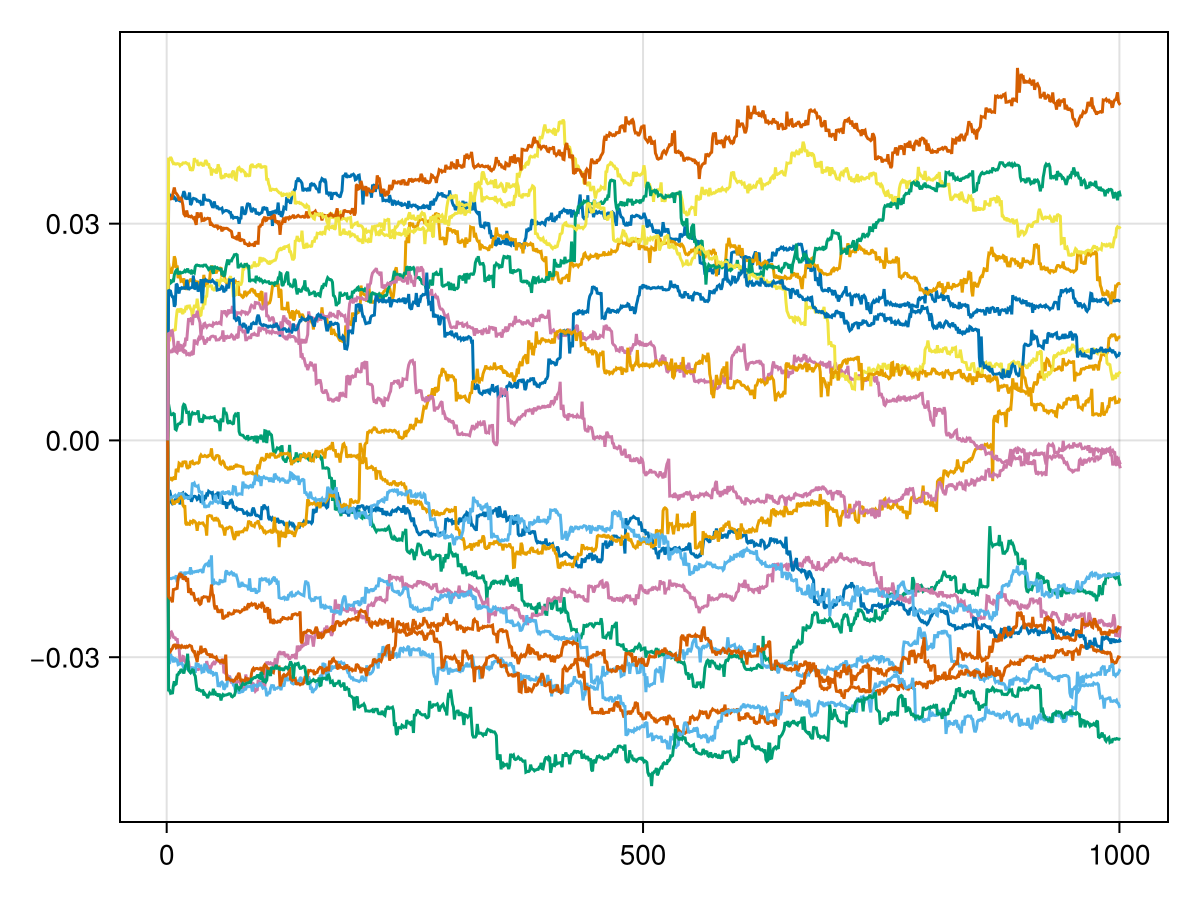

In [26]:
using CairoMakie
f = Figure()
ax = Axis(f[1,1])

Ω₀ = sqrt.(1 .+ sum(k[:,1,:].^2, dims=2)) + sum(u[:,1,:] .* k[:,1,:], dims=2)
Ω  = sqrt.(1 .+ sum(k[:,:,:].^2, dims=3)) + sum(u[:,:,:] .* k[:,:,:], dims=3)
println(size(Ω₀))
println(size(Ω))
percent_diff = (Ω .- Ω₀) ./ Ω₀
for packet=1:20
    lines!(ax, 1:1001, percent_diff[packet,:])
end
#for packet=1:400
#    lines!(ax, x[packet, idxs, 1], x[packet, idxs, 2])
#end
#scatter!(ax, u[:, end, 1], u[:, end, 2])
#scatter!(ax, k[:, end, 1], k[:, end, 2])
#scatter!(ax, k[:, end, 1], k[:, end, 2])
#scatter!(ax, x[:, 3, 1], x[:, 3, 2])
#arrows!(ax, x[:, 1, 1], x[:, 1, 2], k[:, 1, 1], k[:, 1, 2], lengthscale=0.1)
#arrows!(ax, x[:, 1, 1], x[:, 1, 2], u[:, 1, 1], u[:, 1, 2], lengthscale=10.)

#scatter!(ax, x[:, 3, 1], x[:, 3, 2])
f

In [29]:
sum(sqrt.(sum(u.^2, dims=3)))/size(u, 1)/size(u, 2)

0.006526903766845534

In [69]:
 x[:, 1, 1:2]

400×2 Matrix{Float64}:
 0.025  0.025
 0.025  0.075
 0.025  0.125
 0.025  0.175
 0.025  0.225
 0.025  0.275
 0.025  0.325
 0.025  0.375
 0.025  0.425
 0.025  0.475
 0.025  0.525
 0.025  0.575
 0.025  0.625
 ⋮      
 0.975  0.425
 0.975  0.475
 0.975  0.525
 0.975  0.575
 0.975  0.625
 0.975  0.675
 0.975  0.725
 0.975  0.775
 0.975  0.825
 0.975  0.875
 0.975  0.925
 0.975  0.975

In [13]:
using LinearAlgebra: ldiv!, mul!
grid = TwoDGrid(CPU(); nx=128,Lx=2π)
@devzeros typeof(grid.device) Complex{Float32} (grid.nkr, grid.nl) temp_in_field
@devzeros typeof(grid.device) Float32 (grid.nx, grid.ny) temp_out_field
mul!(temp_out_field, grid.rfftplan, temp_in_field)

LoadError: MethodError: no method matching mul!(::Matrix{Float32}, ::FFTW.rFFTWPlan{Float64, -1, false, 2, Tuple{Int64, Int64}}, ::Matrix{ComplexF32}, ::Bool, ::Bool)

[0mClosest candidates are:
[0m  mul!([91m::ChainRulesCore.AbstractThunk[39m, ::Any, ::Any, ::Any, ::Any)
[0m[90m   @[39m [33mChainRulesCore[39m [90m/ext3/pkgs/packages/ChainRulesCore/I1EbV/src/tangent_types/[39m[90m[4mthunks.jl:99[24m[39m
[0m  mul!(::Any, [91m::ChainRulesCore.AbstractThunk[39m, ::Any, ::Any, ::Any)
[0m[90m   @[39m [33mChainRulesCore[39m [90m/ext3/pkgs/packages/ChainRulesCore/I1EbV/src/tangent_types/[39m[90m[4mthunks.jl:109[24m[39m
[0m  mul!(::Any, ::Any, [91m::ChainRulesCore.AbstractThunk[39m, ::Any, ::Any)
[0m[90m   @[39m [33mChainRulesCore[39m [90m/ext3/pkgs/packages/ChainRulesCore/I1EbV/src/tangent_types/[39m[90m[4mthunks.jl:110[24m[39m
[0m  ...


In [53]:
function generate_initial_wavepackets(L, k0, Npackets, sqrtNpackets)
    wavepackets_array = CuArray{Float32}(undef, Npackets, 4)
    offset = L/sqrtNpackets/2;
    x = @views wavepackets_array[:, 1]
    y = @views wavepackets_array[:, 2]
    k = @views wavepackets_array[:, 3]
    l = @views wavepackets_array[:, 4]

    I = CuArray(1:sqrtNpackets)
    diagonal = @. I*L/sqrtNpackets - L/2 - offset
    println(diagonal)
    println(typeof(diagonal))
    x .= repeat(diagonal, inner=sqrtNpackets)
    y .= repeat(diagonal, outer=sqrtNpackets)
    @. k = k0 * cos(2*pi*J / Npackets)
    @. l = k0 * sin(2*pi*J / Npackets)
    return wavepackets_array;
end

generate_initial_wavepackets (generic function with 2 methods)

In [54]:
using CUDA
sqrtNpackets = 3
Npackets = sqrtNpackets^2
L = 2π
I = 1:sqrtNpackets
J = 1:Npackets

diagonal = @. I*L/sqrtNpackets - L/2 - L/sqrtNpackets/2
#repeat(diagonal, outer=sqrtNpackets)
generate_initial_wavepackets(2π, 1.0, 9, 3)

[-2.0943951023931957, -2.220446049250313e-16, 2.0943951023931957]
CuArray{Float64, 1, CUDA.DeviceMemory}


9×4 CuArray{Float32, 2, CUDA.DeviceMemory}:
 -2.0944       -2.0944        0.766044   0.642788
 -2.0944       -2.22045f-16   0.173648   0.984808
 -2.0944        2.0944       -0.5        0.866025
 -2.22045f-16  -2.0944       -0.939693   0.34202
 -2.22045f-16  -2.22045f-16  -0.939693  -0.34202
 -2.22045f-16   2.0944       -0.5       -0.866025
  2.0944       -2.0944        0.173648  -0.984808
  2.0944       -2.22045f-16   0.766044  -0.642788
  2.0944        2.0944        1.0       -2.44929f-16

In [29]:
nx, Lx = 64, 2π

grid = TwoDGrid(; nx, Lx, x0 = -Lx/3, T=Float32)

u = @. Float32(sin(2 * grid.x) + 1/2 * cos(5 * grid.y'))

@devzeros typeof(grid.device) Complex{Float32} (grid.nkr, grid.nl) uh1
uh2 = Complex.(zeros(grid.nkr, grid.nl))

println(typeof(uh1))
println(typeof(uh2))

using LinearAlgebra: mul!

mul!(uh1, grid.rfftplan, u)

Matrix{ComplexF32}
Matrix{ComplexF64}


33×64 Matrix{ComplexF32}:
  5.53131f-5+0.0im         …  -5.78825f-5-1.86953f-7im
   0.0001177+4.80189f-5im     -6.54238f-7-5.95799f-7im
     1773.62+1024.0im          -5.6292f-7+0.0im
 -6.66825f-5-5.98946f-5im     -9.64159f-7-6.34371f-7im
 -4.49307f-5-4.28003f-5im     -3.87647f-7-1.62915f-6im
 -1.64035f-5-6.15512f-5im  …  -3.48718f-7+1.42067f-6im
  9.53047f-6-4.52346f-5im     -4.79239f-7-2.79042f-6im
 -2.07549f-5+2.07954f-5im      4.98898f-7-9.03297f-7im
   -6.607f-5-1.71868f-5im      1.67428f-6-1.29279f-7im
 -3.85452f-5-4.62703f-5im     -1.33144f-6+7.67705f-7im
 -4.67913f-6-3.64213f-5im  …   1.62709f-6+3.18849f-6im
  3.35346f-5-5.19922f-5im      5.12939f-7+2.35058f-8im
  4.86644f-5+1.8084f-5im      -3.99531f-7+3.39084f-6im
            ⋮              ⋱  
 -1.07763f-6+1.26546f-5im      5.81787f-9+7.40634f-7im
  9.65262f-6+4.6005f-6im      -6.28614f-7-4.00802f-6im
  8.87726f-7-2.79557f-5im     -1.94739f-7+4.21732f-7im
  1.89823f-5+9.51608f-6im      1.41086f-6-2.17759f-6im
  1.73095f-5-4.